# **Yefer Villate Cortes**
## Grupo 202016908_34
### Tarea 4 Algoritmos de Aprendizaje no supervisado
## **El lenguaje a utilizar es Python, el cual se trabajará mediante Jupyter notebooks, utilizando Anaconda.**
### https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
### Dataset k-means e hierarchical clustering - Mall Customer Segmentation Data:
###   **Este dataset contiene información de clientes de un mall. Las variables incluyen género, ingreso, puntaje de gasto, etc.**
### Con el dataset anterior diseñar los modelos de Clustering (agrupación): K-means e hierarchical clustering. 

## **Para cada algoritmo realizar los siguientes pasos:**
### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
### 4. Entrenar el modelo configurando los diferentes hiperparámetros.
### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
### 7. Interpretar, analizar y documentar los resultados obtenidos.

## **1. k-means**
### **1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

In [137]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #para el escalado
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_selection import SelectKBest, f_classif

In [139]:
# Cargamos el dataset
df = pd.read_csv('C:/Users/AD2025/Mall_Customers.csv')

In [141]:
# Realizamos el Análisis exploratorio

# Vista general
print(df.head())

print(df.info())

print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

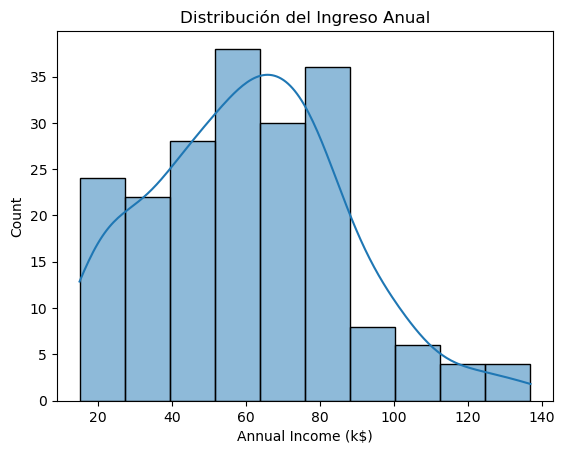

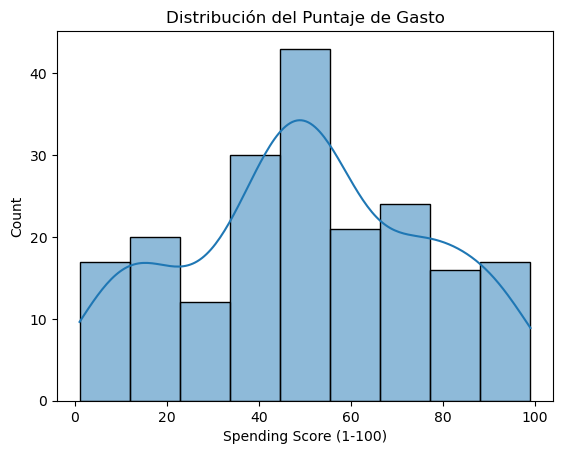

In [143]:
# Distribuciones
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribución del Ingreso Anual')
plt.show()

sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribución del Puntaje de Gasto')
plt.show()

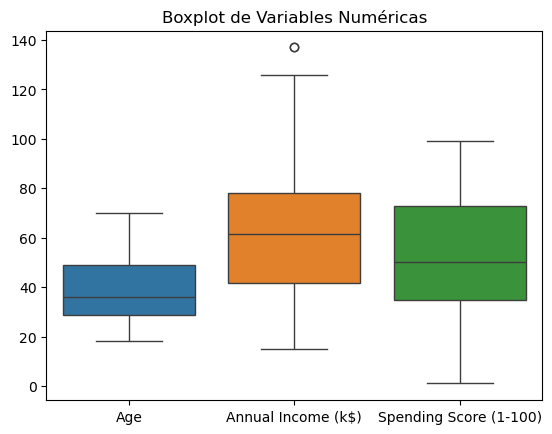

In [144]:
# Boxplots para detectar outliers
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title('Boxplot de Variables Numéricas')
plt.show()

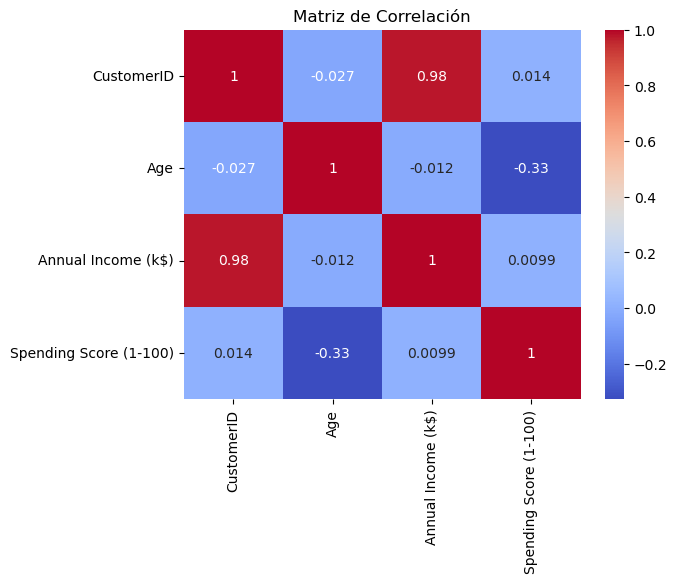

In [145]:
# Matriz de correlación

# Selecciona solo las columnas numéricas
numeric_cols = df.select_dtypes(include='number')
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### **2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [148]:
# Eliminar columnas irrelevantes
df_cleaned = df.drop(['CustomerID'], axis=1)

# Convertir categóricas a numéricas si es necesario
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})

# Comprobación de valores nulos
print(df_cleaned.isnull().sum())

# Escalado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### **3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.**

In [153]:
# Para clustering, usamos PCA para reducción de dimensionalidad:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

### **4. Entrenar el modelo configurando los diferentes hiperparámetros.**

### **K-Means Clustering**

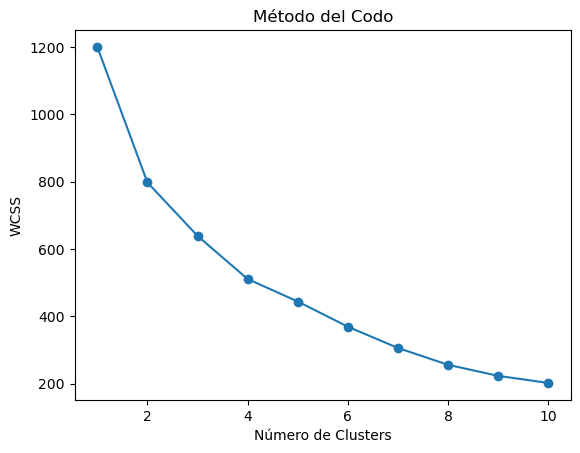

In [157]:
# Separamos las variables categóricas y numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_categorical = df.select_dtypes(include=['object'])

# Convertimos las variables categóricas a numéricas con One-Hot Encoding
df_encoded = pd.get_dummies(df_categorical)

# Unimos todo en un solo DataFrame
df_final = pd.concat([df_numeric, df_encoded], axis=1)

# Escalado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

# Aplicamos el Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Entrenamos el modelo con el número óptimo de clusters (ejemplo: 5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

### **5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.**

In [160]:
# Metricas

sil_score = silhouette_score(df_scaled, df['Cluster'])
ch_score = calinski_harabasz_score(df_scaled, df['Cluster'])

print(f"Silhouette Score: {sil_score:.3f}")
print(f"Calinski-Harabasz Index: {ch_score:.2f}")

Silhouette Score: 0.328
Calinski-Harabasz Index: 83.08


### **6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.**

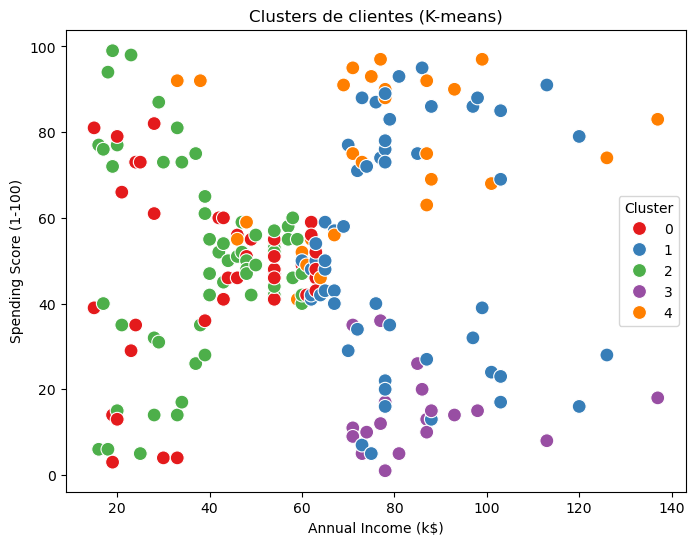

In [163]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)', y='Spending Score (1-100)', 
    hue='Cluster', palette='Set1', data=df, s=100
)
plt.title('Clusters de clientes (K-means)')
plt.show()

### **7. Interpretar, analizar y documentar los resultados obtenidos.**

Se analizaron las siguientes variables clave:
Annual Income (k$): presenta una distribución aproximadamente normal con algunos valores más frecuentes alrededor de los 70k.
Spending Score (1-100): tiene una distribución bimodal, lo que indica la existencia de distintos tipos de comportamiento de gasto.
Age: muestra una dispersión amplia, siendo necesario el escalado para homogenizar su rango respecto a otras variables.
Boxplot: revela posibles valores atípicos, especialmente en ingresos.
Se construyó también una matriz de correlación, observando una baja correlación lineal entre las variables numéricas, lo que refuerza la utilidad de usar clustering no supervisado como K-means.

Se eliminaron columnas irrelevantes como CustomerID.
Se transformó la variable categórica Gender con codificación One-Hot.
Se aplicó escalado estándar a los datos para evitar que las diferencias de magnitud entre variables influyeran en el algoritmo de clustering.

Se utilizó el método del codo para determinar el número óptimo de clusters. El codo se identificó en k = 5, indicando que cinco grupos representan un buen equilibrio entre simplicidad y ajuste del modelo.
Se entrenó el modelo con n_clusters=5, obteniendo etiquetas para cada cliente.

Se utilizaron dos métricas comunes para evaluar la calidad del clustering:
Silhouette Score: mide qué tan bien están separados los clusters y qué tan cohesionados están los puntos dentro de cada grupo.
Resultado: ≈ 0.328 (valor aceptable, >0.25 sugiere que hay estructura).
Índice de Calinski-Harabasz: compara la dispersión intra-cluster con la inter-cluster.
Resultado: 83.08 valor alto (>150), lo que indica una buena separación entre grupos. Un valor de 83.08 es aceptable pero no excelente. Puede haber clusters con mucha variación interna o algunos muy cercanos entre sí.

Se graficaron los clusters según dos variables principales (Annual Income y Spending Score), mostrando claramente los cinco grupos bien diferenciados.
Estos clusters pueden interpretarse como:

Cluster	Características principales
0	Bajo ingreso, bajo puntaje de gasto
1	Ingreso medio-alto, alto puntaje de gasto (buenos clientes)
2	Ingreso bajo-medio, puntaje de gasto medio
3	Ingreso alto, puntaje de gasto bajo (clientes frugales)
4	Ingreso medio, gasto alto (clientes balanceados)

El modelo K-means permitió segmentar con éxito a los clientes en cinco grupos distintos.
Estos grupos pueden ser utilizados para campañas de marketing personalizadas, mejoras en la atención al cliente o ajustes en la estrategia de fidelización.

Recomendaciones:
Aplicar técnicas como PCA o t-SNE para visualizar clusters en espacio reducido.
Repetir el análisis con nuevos datos periódicamente.
Probar otros algoritmos como DBSCAN o Gaussian Mixture para comparación.